## Problem Statement: Prepare a model for glass classification using KNN

In [1]:
# importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph

In [2]:
# importing Datasets
df = pd.read_csv(r'/Users/ag/Downloads/glass.csv')

### EDA

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Correlation, Skewness & Kurtosis 

In [8]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

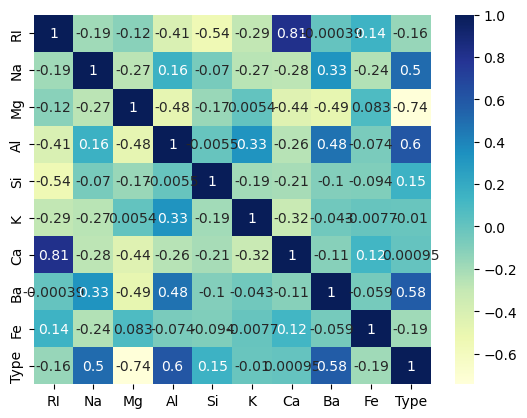

In [9]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [10]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [11]:
df.kurt()

RI       4.931737
Na       3.052232
Mg      -0.410319
Al       2.060569
Si       2.967903
K       54.689699
Ca       6.681978
Ba      12.541084
Fe       2.662016
Type    -0.279518
dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

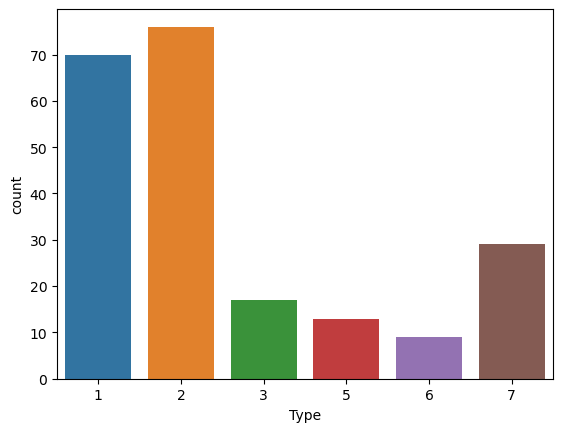

In [12]:
# Checking the Countplot for Target Variable
sns.countplot(df['Type'])
df['Type'].value_counts()

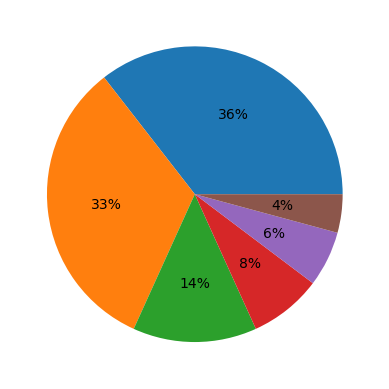

<Figure size 640x480 with 0 Axes>

In [13]:
plt.pie(df['Type'].value_counts(), autopct='%1.0f%%')
plt.show()
plt.tight_layout()

In [14]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

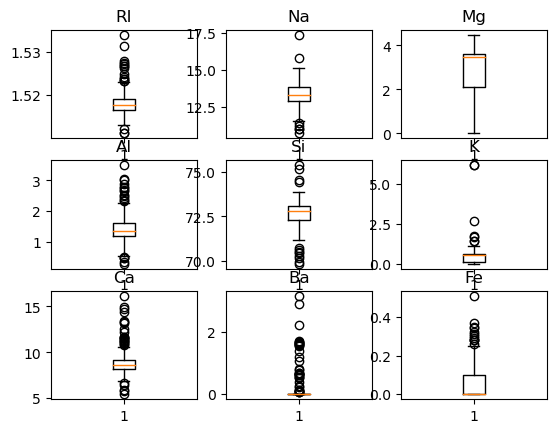

<Figure size 640x480 with 0 Axes>

In [15]:
# Plotting a Boxplot for checking outliers
fig, ax = plt.subplots(3,3)
ax[0][0].boxplot(df['RI'])
ax[0][0].set_title('RI')
ax[0][1].boxplot(df['Na'])
ax[0][1].set_title('Na')
ax[0][2].boxplot(df['Mg'])
ax[0][2].set_title('Mg')
ax[1][0].boxplot(df['Al'])
ax[1][0].set_title('Al')
ax[1][1].boxplot(df['Si'])
ax[1][1].set_title('Si')
ax[1][2].boxplot(df['K'])
ax[1][2].set_title('K')
ax[2][0].boxplot(df['Ca'])
ax[2][0].set_title('Ca')
ax[2][1].boxplot(df['Ba'])
ax[2][1].set_title('Ba')
ax[2][2].boxplot(df['Fe'])
ax[2][2].set_title('Fe')
plt.show()
plt.tight_layout()

### From the plot found that there are outlier in Columns RI, Na, AI, Si, K, Ca, Ba, Fe

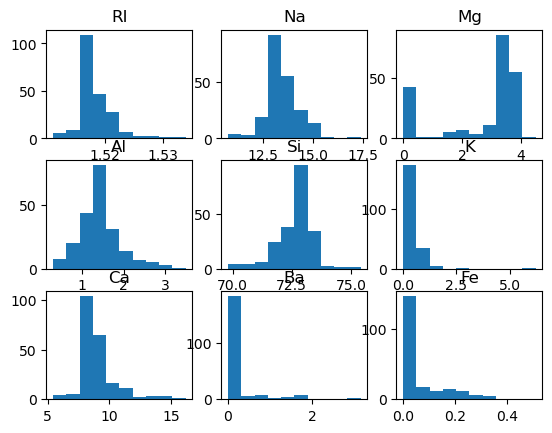

<Figure size 640x480 with 0 Axes>

In [16]:
# Plotting a Histogram for checking skewness
fig, ax = plt.subplots(3,3)
ax[0][0].hist(df['RI'])
ax[0][0].set_title('RI')
ax[0][1].hist(df['Na'])
ax[0][1].set_title('Na')
ax[0][2].hist(df['Mg'])
ax[0][2].set_title('Mg')
ax[1][0].hist(df['Al'])
ax[1][0].set_title('Al')
ax[1][1].hist(df['Si'])
ax[1][1].set_title('Si')
ax[1][2].hist(df['K'])
ax[1][2].set_title('K')
ax[2][0].hist(df['Ca'])
ax[2][0].set_title('Ca')
ax[2][1].hist(df['Ba'])
ax[2][1].set_title('Ba')
ax[2][2].hist(df['Fe'])
ax[2][2].set_title('Fe')
plt.show()
plt.tight_layout()

#### From the Graph found that RI has Postive Skewness and Kurtosis
#### From the Graph found that Na has Postive Skewness and Kurtosis
#### From the Graph found that Mg has Negative Skewness and Kurtosis
#### From the Graph found that Al has Postive Skewness and Kurtosis
#### From the Graph found that Si has Negative Skewness and Postive Kurtosis
#### From the Graph found that K has Postive Skewness and Kurtosis
#### From the Graph found that Ca has Postive Skewness and Kurtosis
#### From the Graph found that Ba has Postive Skewness and Kurtosis
#### From the Graph found that Fe has Postive Skewness and Kurtosis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


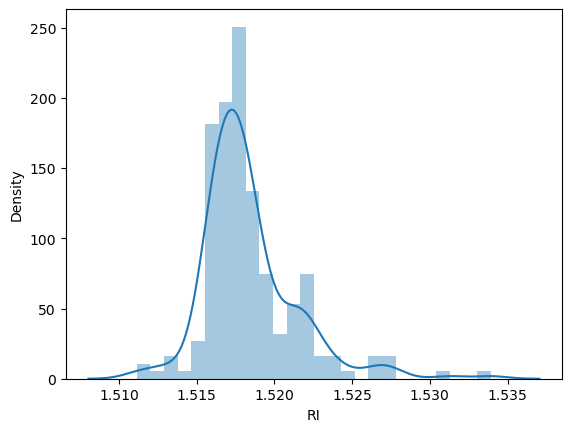

<Figure size 640x480 with 0 Axes>

In [17]:
sns.distplot(df['RI'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


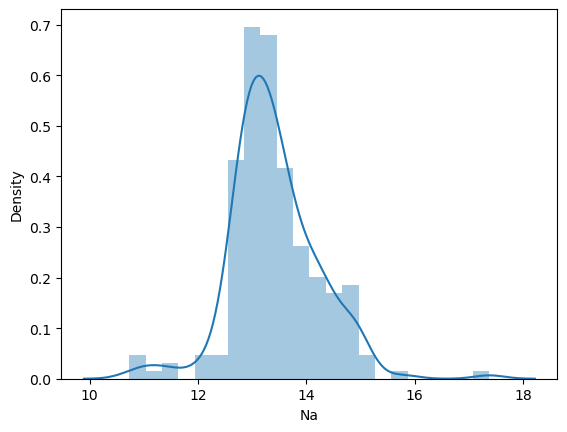

<Figure size 640x480 with 0 Axes>

In [18]:
sns.distplot(df['Na'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


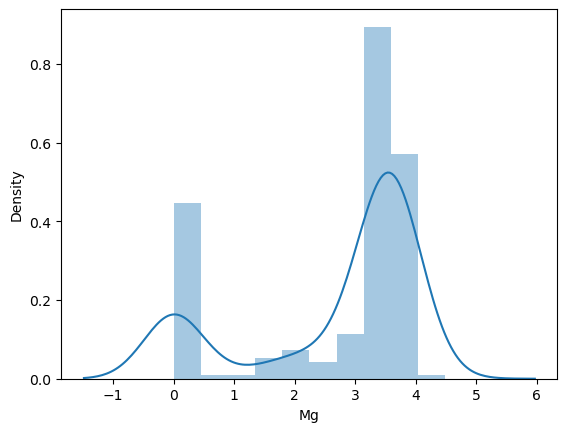

<Figure size 640x480 with 0 Axes>

In [19]:
sns.distplot(df['Mg'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


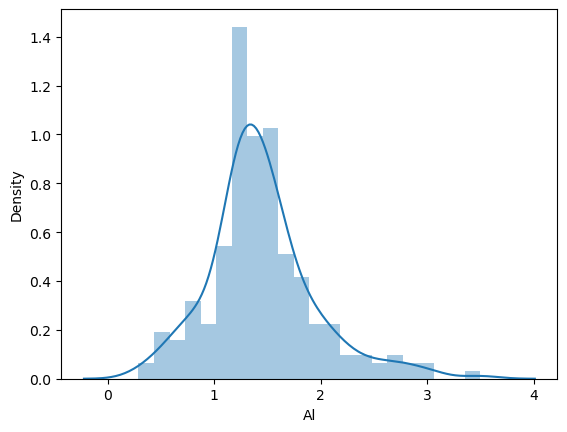

<Figure size 640x480 with 0 Axes>

In [20]:
sns.distplot(df['Al'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


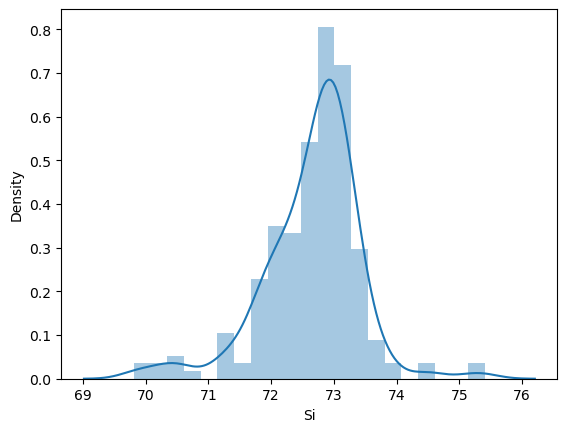

<Figure size 640x480 with 0 Axes>

In [21]:
sns.distplot(df['Si'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


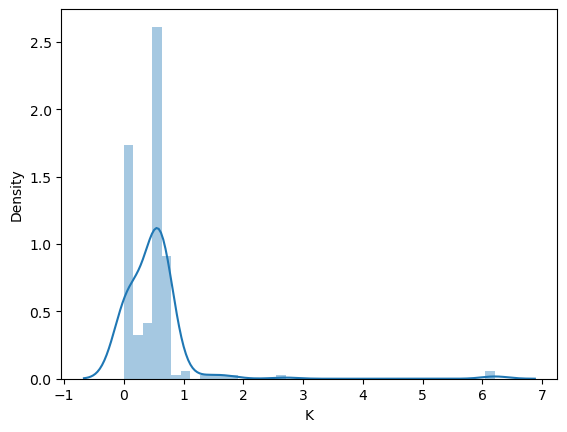

<Figure size 640x480 with 0 Axes>

In [22]:
sns.distplot(df['K'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


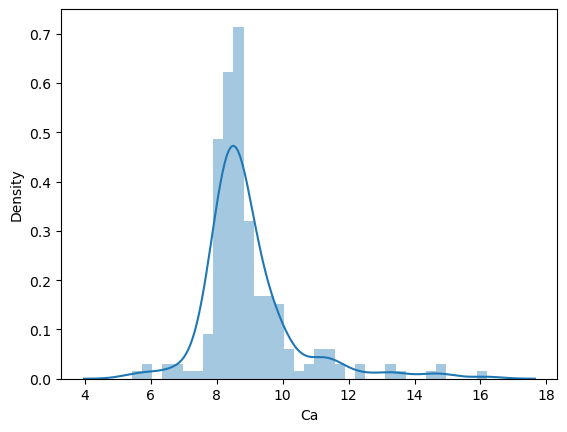

<Figure size 640x480 with 0 Axes>

In [23]:
sns.distplot(df['Ca'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


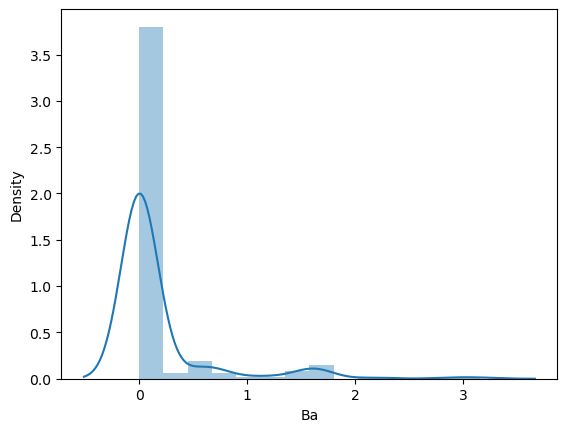

<Figure size 640x480 with 0 Axes>

In [24]:
sns.distplot(df['Ba'])
plt.show()
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


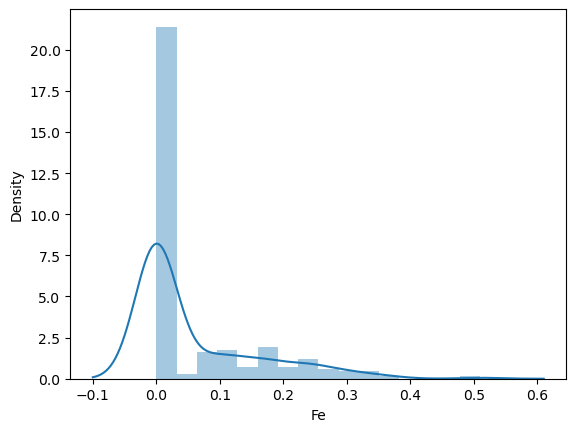

<Figure size 640x480 with 0 Axes>

In [25]:
sns.distplot(df['Fe'])
plt.show()
plt.tight_layout()

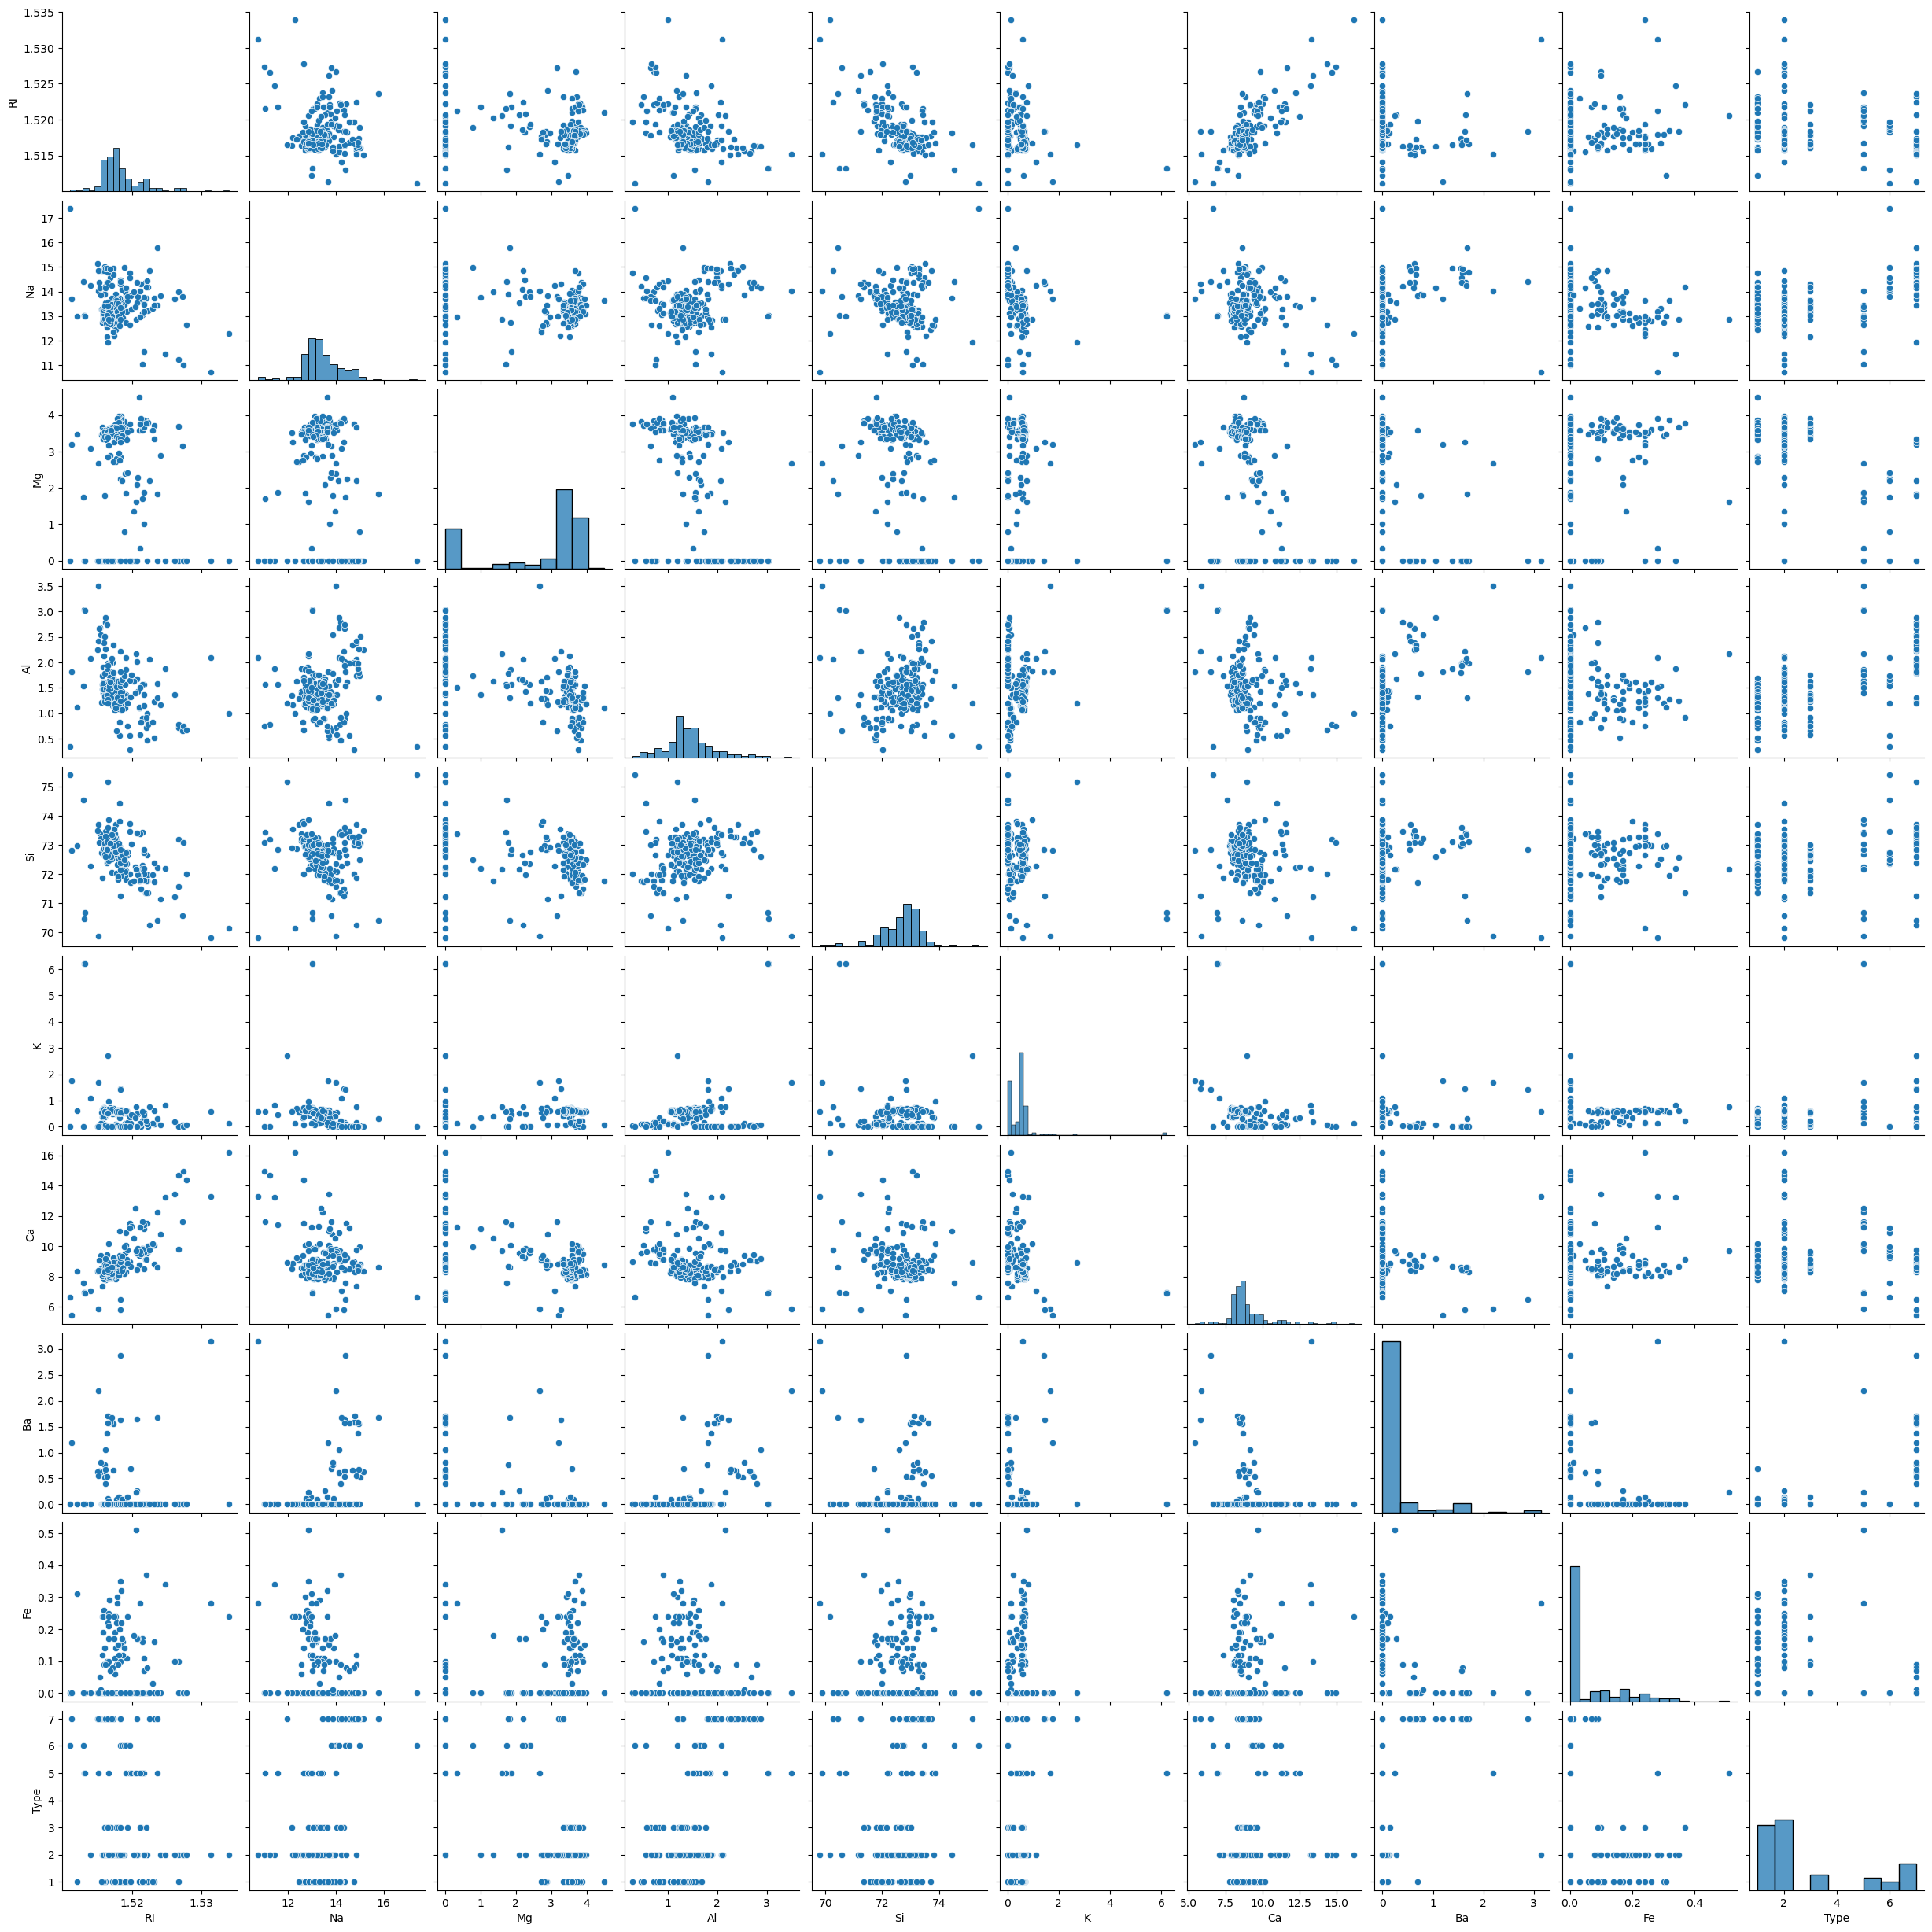

In [26]:
sns.pairplot(df)

#### From the Pairplot found that RI has a Negative correlation with Na, Mg, AI, Si, K, Ca, Ba & Postive Correlation with Fe
#### From the Pairplot found that Na has a Negative correlation with RI, Mg, Si, K, Ca, Fe & Postive Correlation with AI & Ba
#### From the Pairplot found that Mg has a Negative correlation with RI, Na, AI, Si, Ca, Ba & Postive Correlation with K & Fe
#### From the Pairplot found that AI has a Negative correlation with RI, Mg, Si, Ca, Fe & Postive Correlation with Na, K & Ba
#### From the Pairplot found that Si has a Negative correlation with RI, Na, Mg, Ai, K, Ca,Ba & Fe
#### From the Pairplot found that K has a Negative correlation with RI,Na,Si, Ca, Ba, Fe & Postive Correlation with AI
#### From the Pairplot found that Ca has a Negative correlation with Na, Mg, AI, Si, K, Ba & Postive Correlation with RI & Fe
#### From the Pairplot found that Ba has a Negative correlation with Mg, Si, Ca & Postive Correlation with Na & AI
#### From the Pairplot found that Fe has a Negative correlation with Na & Postive Correlation with RI & Ca

In [27]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [28]:
# Checking Null Values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

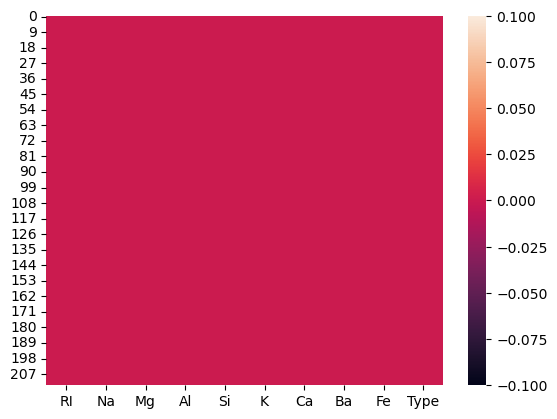

In [29]:
sns.heatmap(df.isnull())

In [30]:
X = df.drop(columns=['Type'])
y = df.Type

In [31]:
sc = StandardScaler()

In [32]:
X_sc = sc.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=.20, random_state=20)

In [34]:
KNC = KNeighborsClassifier()

In [35]:
KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = KNC.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
error_rate = [] #list that will store the average error rate value of k

for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.3953488372093023,
 0.3953488372093023,
 0.4186046511627907,
 0.46511627906976744,
 0.46511627906976744,
 0.46511627906976744,
 0.4186046511627907,
 0.4883720930232558,
 0.4883720930232558,
 0.5348837209302325,
 0.4883720930232558,
 0.4883720930232558,
 0.4883720930232558,
 0.5116279069767442,
 0.5116279069767442,
 0.5348837209302325,
 0.4418604651162791,
 0.4883720930232558,
 0.46511627906976744,
 0.46511627906976744,
 0.4883720930232558,
 0.4883720930232558,
 0.4418604651162791,
 0.46511627906976744,
 0.46511627906976744,
 0.4883720930232558,
 0.4418604651162791,
 0.46511627906976744,
 0.46511627906976744,
 0.4883720930232558]

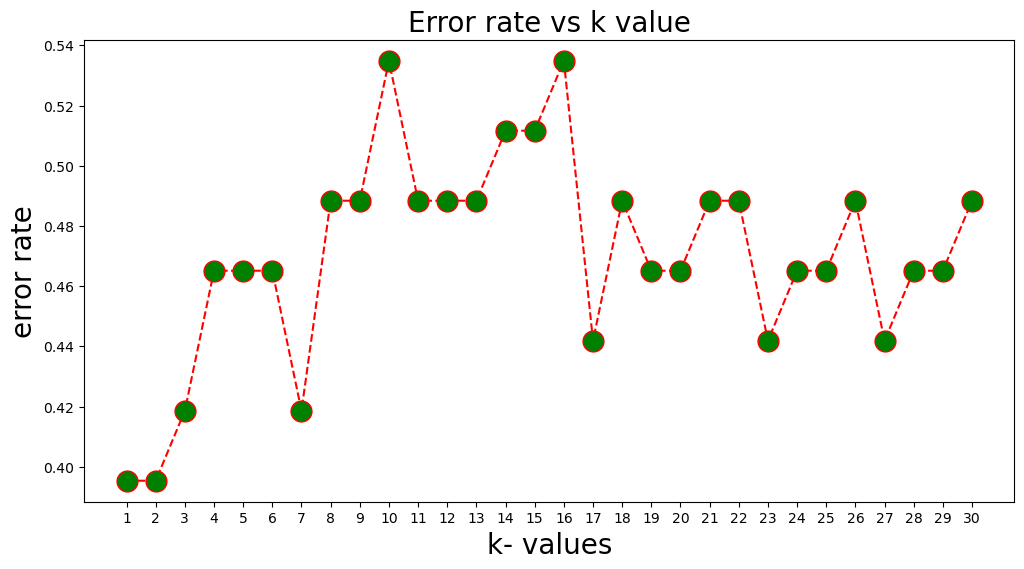

In [38]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


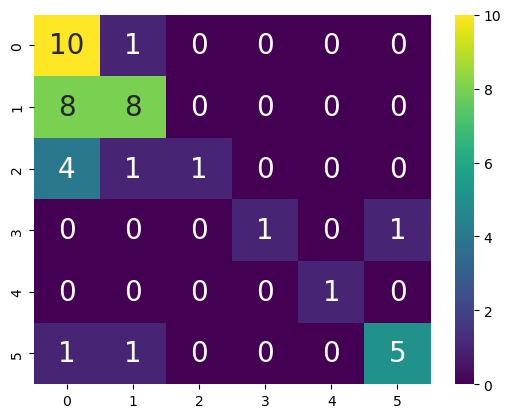

In [52]:
from sklearn.metrics import confusion_matrix
clf=KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, predicted_value))

              precision    recall  f1-score   support

           1       0.43      0.91      0.59        11
           2       0.73      0.50      0.59        16
           3       1.00      0.17      0.29         6
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       0.83      0.71      0.77         7

    accuracy                           0.60        43
   macro avg       0.83      0.63      0.65        43
weighted avg       0.73      0.60      0.59        43



In [56]:
KNC.score(X_test, predicted_value)*100

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


74.4186046511628